# Tugas Besar 2 IF3170 - Intelegensi Buatan
## Kelompok Butuh Passingan
### Nama Anggota :
1. Andreas Halim - 13516003
2. Aldo Azali - 13516125
3. Untung Tanujaya - 13516135
4. Dafi Faraz - 13516057
5. Jeffry - 13516156

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('tubes2_HeartDisease_train.csv', na_values='?')
dg = pd.read_csv('tubes2_HeartDisease_test.csv', na_values='?')
df.shape

(779, 14)

In [3]:
df.head()

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11,Column12,Column13,Column14
0,54,1,4,125.0,216.0,0.0,0.0,140.0,0.0,0.0,NaN,NaN,NaN,1
1,55,1,4,158.0,217.0,0.0,0.0,110.0,1.0,2.5,2.0,NaN,NaN,1
2,54,0,3,135.0,304.0,1.0,0.0,170.0,0.0,0.0,1.0,0.0,3.0,0
3,48,0,3,120.0,195.0,0.0,0.0,125.0,0.0,0.0,NaN,NaN,NaN,0
4,50,1,4,120.0,0.0,0.0,1.0,156.0,1.0,0.0,1.0,NaN,6.0,3


In [4]:
df.columns = ['Age', 'Sex', 'Chest-Pain_Type', 'Resting_Blood_Pressure', 'Serum_Cholestrol', 'Fasting_Blood_Sugar_120',
       'resting_ECG', 'Max-Heart_Rate_Achieved', 'Exercise_Induced_Angina', 'ST_Depression', 'Peak_Exercise', 'Number_Major_Vessels',
       'Thal', 'Diagnosis_HD']
dg.columns = ['Age', 'Sex', 'Chest-Pain_Type', 'Resting_Blood_Pressure', 'Serum_Cholestrol', 'Fasting_Blood_Sugar_120',
       'resting_ECG', 'Max-Heart_Rate_Achieved', 'Exercise_Induced_Angina', 'ST_Depression', 'Peak_Exercise', 'Number_Major_Vessels',
       'Thal']

In [5]:
dg.head()

,Age,Sex,Chest-Pain_Type,Resting_Blood_Pressure,Serum_Cholestrol,Fasting_Blood_Sugar_120,resting_ECG,Max-Heart_Rate_Achieved,Exercise_Induced_Angina,ST_Depression,Peak_Exercise,Number_Major_Vessels,Thal
0,60,1,2,160.0,267.0,1.0,1,157.0,0.0,0.5,2.0,NaN,NaN
1,61,1,4,148.0,203.0,0.0,0,161.0,0.0,0.0,1.0,1.0,7.0
2,54,1,4,130.0,242.0,0.0,0,91.0,1.0,1.0,2.0,NaN,NaN
3,48,1,4,120.0,260.0,0.0,0,115.0,0.0,2.0,2.0,NaN,NaN
4,57,0,1,130.0,308.0,0.0,0,98.0,0.0,1.0,2.0,NaN,NaN


## Data Preprocessing

### Check Null Values
If there is null values, then change it to :
1. Median
2. dummy value (ex : 'Empty' OR '?')
3. mode

In [6]:
# NaN data to Median
# from sklearn.preprocessing import Imputer
# imputer = Imputer(strategy='median')
# pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [7]:
df.isnull().sum()

Age                          0
Sex                          0
Chest-Pain_Type              0
Resting_Blood_Pressure      47
Serum_Cholestrol            24
Fasting_Blood_Sugar_120     78
resting_ECG                  2
Max-Heart_Rate_Achieved     44
Exercise_Induced_Angina     44
ST_Depression               49
Peak_Exercise              262
Number_Major_Vessels       514
Thal                       408
Diagnosis_HD                 0
dtype: int64

In [8]:
from statistics import mode
# RBP, SC, MHRA, STD,  = median
# FBS, ecg, EIA, pe, NMV, thal = mode
# fbs, ECG , eia, PE,nmv, THAL = 'Empty'
rbp_med = df['Resting_Blood_Pressure'].median()
sc_med = df['Serum_Cholestrol'].median()
mhra_med = df['Max-Heart_Rate_Achieved'].median()
std_med = df['ST_Depression'].median()
fbs_mod = mode(df['Fasting_Blood_Sugar_120'])
ecg_mod = mode(df['resting_ECG'])
eia_mod = mode(df['Exercise_Induced_Angina'])
pe_mod = mode(df['Peak_Exercise'])
nmv_mod = mode(df['Number_Major_Vessels'])
thal_mod = mode(df['Thal'])

In [9]:
# Fill with median
df['Resting_Blood_Pressure'] = df['Resting_Blood_Pressure'].fillna(rbp_med)
df['Serum_Cholestrol'] = df['Serum_Cholestrol'].fillna(sc_med)
df['Max-Heart_Rate_Achieved'] = df['Max-Heart_Rate_Achieved'].fillna(mhra_med)
df['ST_Depression'] = df['ST_Depression'].fillna(std_med)
df['Fasting_Blood_Sugar_120'] = df['Fasting_Blood_Sugar_120'].fillna(fbs_mod)
df['resting_ECG'] = df['resting_ECG'].fillna(ecg_mod)
df['Exercise_Induced_Angina'] = df['Exercise_Induced_Angina'].fillna(eia_mod)
df['Peak_Exercise'] = df['Peak_Exercise'].fillna(pe_mod)
df['Number_Major_Vessels'] = df['Number_Major_Vessels'].fillna(nmv_mod)
df['Thal'] = df['Thal'].fillna(thal_mod)
# Others Fill with '?'
# df = df.fillna('?')
df.isnull().sum()

Age                        0
Sex                        0
Chest-Pain_Type            0
Resting_Blood_Pressure     0
Serum_Cholestrol           0
Fasting_Blood_Sugar_120    0
resting_ECG                0
Max-Heart_Rate_Achieved    0
Exercise_Induced_Angina    0
ST_Depression              0
Peak_Exercise              0
Number_Major_Vessels       0
Thal                       0
Diagnosis_HD               0
dtype: int64

In [10]:
rbp_medg = dg['Resting_Blood_Pressure'].median()
sc_medg = dg['Serum_Cholestrol'].median()
mhra_medg = dg['Max-Heart_Rate_Achieved'].median()
std_medg = dg['ST_Depression'].median()
dg.isnull().sum()

Age                         0
Sex                         0
Chest-Pain_Type             0
Resting_Blood_Pressure     12
Serum_Cholestrol            6
Fasting_Blood_Sugar_120    12
resting_ECG                 0
Max-Heart_Rate_Achieved    11
Exercise_Induced_Angina    11
ST_Depression              13
Peak_Exercise              47
Number_Major_Vessels       97
Thal                       78
dtype: int64

In [11]:
# Fill with median
dg['Resting_Blood_Pressure'] = dg['Resting_Blood_Pressure'].fillna(rbp_medg)
dg['Serum_Cholestrol'] = dg['Serum_Cholestrol'].fillna(sc_medg)
dg['Max-Heart_Rate_Achieved'] = dg['Max-Heart_Rate_Achieved'].fillna(mhra_medg)
dg['ST_Depression'] = dg['ST_Depression'].fillna(std_medg)
# Others Fill with '?'
dg = dg.fillna('?')

In [12]:
dg.isnull().sum()

Age                        0
Sex                        0
Chest-Pain_Type            0
Resting_Blood_Pressure     0
Serum_Cholestrol           0
Fasting_Blood_Sugar_120    0
resting_ECG                0
Max-Heart_Rate_Achieved    0
Exercise_Induced_Angina    0
ST_Depression              0
Peak_Exercise              0
Number_Major_Vessels       0
Thal                       0
dtype: int64

### Create Data Split Train and Data Split Test(90:10)

In [13]:
from scipy.stats import ttest_ind

In [14]:
y_train = df['Diagnosis_HD']  # yang ingin diprediksi
X_train = df.drop(['Diagnosis_HD'], axis = 1)

In [15]:
from sklearn.model_selection import train_test_split
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X_train, y_train, test_size = 0.25, random_state=123)
X_train_split.head()

,Age,Sex,Chest-Pain_Type,Resting_Blood_Pressure,Serum_Cholestrol,Fasting_Blood_Sugar_120,resting_ECG,Max-Heart_Rate_Achieved,Exercise_Induced_Angina,ST_Depression,Peak_Exercise,Number_Major_Vessels,Thal
560,37,0,3,130.0,211.0,0.0,0.0,142.0,0.0,0.0,2.0,0.0,3.0
526,71,1,4,130.0,221.0,0.0,1.0,115.0,1.0,0.0,2.0,0.0,3.0
521,52,1,4,135.0,0.0,0.0,0.0,128.0,1.0,2.0,2.0,0.0,7.0
317,53,0,4,130.0,264.0,0.0,2.0,143.0,0.0,4.0,2.0,0.0,3.0
31,58,0,4,100.0,248.0,0.0,2.0,122.0,0.0,1.0,2.0,0.0,3.0


In [16]:
y_train_split.head()

560    0
526    3
521    2
317    0
31     0
Name: Diagnosis_HD, dtype: int64

### Create Data Full Train and Data Test

In [17]:
#TBD

## Data Processing

### Feature Engineering

In [18]:
# TBD

### Make Dummies

In [19]:
X_train_split_d = pd.get_dummies(X_train_split)
X_test_split_d = pd.get_dummies(X_test_split)

In [20]:
X_train_split_d.head()

,Age,Sex,Chest-Pain_Type,Resting_Blood_Pressure,Serum_Cholestrol,Fasting_Blood_Sugar_120,resting_ECG,Max-Heart_Rate_Achieved,Exercise_Induced_Angina,ST_Depression,Peak_Exercise,Number_Major_Vessels,Thal
560,37,0,3,130.0,211.0,0.0,0.0,142.0,0.0,0.0,2.0,0.0,3.0
526,71,1,4,130.0,221.0,0.0,1.0,115.0,1.0,0.0,2.0,0.0,3.0
521,52,1,4,135.0,0.0,0.0,0.0,128.0,1.0,2.0,2.0,0.0,7.0
317,53,0,4,130.0,264.0,0.0,2.0,143.0,0.0,4.0,2.0,0.0,3.0
31,58,0,4,100.0,248.0,0.0,2.0,122.0,0.0,1.0,2.0,0.0,3.0


In [21]:
null_in_test = list(set(X_train_split.columns) - set(X_test_split.columns))
null_in_train = list(set(X_test_split.columns) - set(X_train_split.columns))
print(null_in_test)
print(null_in_train)

[]
[]


In [22]:
for col in null_in_test:
    X_test_split[col] = 0

In [23]:
null_in_test = list(set(X_train_split.columns) - set(X_test_split.columns))
null_in_train = list(set(X_test_split.columns) - set(X_train_split.columns))
print(null_in_test)
print(null_in_train)

[]
[]


### Modeling with ML

In [24]:
from sklearn.metrics import accuracy_score

#### KNN (K Nearest Neighbors)

In [25]:
from sklearn.neighbors import KNeighborsClassifier

In [26]:
# error_rate = []
# for i in range(1,40):
#     knn = KNeighborsClassifier(n_neighbors=i)
#     knn.fit(X_train_split, y_train_split)
#     predict_knn_i = knn.predict(X_test_split)
#     error_rate.append(np.mean(predict_knn_i != y_test_split))

In [27]:
# # Configure and plot error rate over k values
# plt.figure(figsize=(10,4))
# plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
# plt.title('Error Rate vs. K-Values')
# plt.xlabel('K-Values')
# plt.ylabel('Error Rate')

In [28]:
knn = KNeighborsClassifier(n_neighbors=25)
knn.fit(X_train_split, y_train_split)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=25, p=2,
           weights='uniform')

In [29]:
predict_knn = knn.predict(X_test_split)

In [30]:
predict_knn

array([3, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 3, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       2, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 3, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 3, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 3, 3, 0, 2, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1],
      dtype=int64)

In [31]:
y_test_split[0:20]

166    3
375    1
594    0
639    2
677    3
499    0
307    0
230    1
57     0
396    3
55     0
134    1
272    4
289    0
389    0
673    1
632    0
728    3
162    0
164    0
Name: Diagnosis_HD, dtype: int64

In [32]:
print('Nilai akurasi knn  : ', accuracy_score(y_test_split, predict_knn))

Nilai akurasi knn  :  0.49743589743589745


In [33]:
knn.score(X_train_split ,y_train_split)

0.535958904109589

In [34]:
knn.score(X_test_split, y_test_split)

0.49743589743589745

In [35]:
# Import classification report and confusion matrix to evaluate predictions
from sklearn.metrics import classification_report, confusion_matrix

In [36]:
print(classification_report(y_test_split, predict_knn))

              precision    recall  f1-score   support

           0       0.58      0.78      0.67        87
           1       0.36      0.48      0.41        52
           2       0.33      0.03      0.06        29
           3       0.50      0.14      0.22        21
           4       0.00      0.00      0.00         6

   micro avg       0.50      0.50      0.50       195
   macro avg       0.36      0.29      0.27       195
weighted avg       0.46      0.50      0.44       195



c:\users\use\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [37]:
# Print out confusion matrix
cmat = confusion_matrix(y_test_split, predict_knn)
print(cmat)
print('TP - True Negative {}'.format(cmat[0,0]))
print('FP - False Positive {}'.format(cmat[0,1]))
print('FN - False Negative {}'.format(cmat[1,0]))
print('TP - True Positive {}'.format(cmat[1,1]))
print('Accuracy Rate: {}'.format(np.divide(np.sum([cmat[0,0],cmat[1,1]]),np.sum(cmat))))
print('Misclassification Rate: {}'.format(np.divide(np.sum([cmat[0,1],cmat[1,0]]),np.sum(cmat))))

[[68 18  0  1  0]
 [24 25  2  1  0]
 [13 14  1  1  0]
 [10  8  0  3  0]
 [ 2  4  0  0  0]]
TP - True Negative 68
FP - False Positive 18
FN - False Negative 24
TP - True Positive 25
Accuracy Rate: 0.47692307692307695
Misclassification Rate: 0.2153846153846154


In [38]:
val_accuracy = []
for i in np.arange(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_split,y_train_split)
    y_predict_split = knn.predict(X_test_split)
    performance = np.mean(y_predict_split == y_test_split)
    val_accuracy.append(performance)

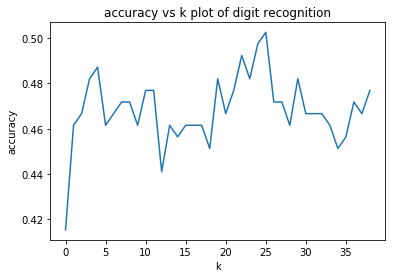

In [39]:
plt.title('accuracy vs k plot of digit recognition')
plt.xlabel('k')
plt.ylabel('accuracy')
plt.plot(val_accuracy)

### Gaussian Naive-Bayes

In [40]:
# from sklearn.naive_bayes import GaussianNB
# gnb = GaussianNB().fit(X_train_split, y_train_split)
# predict_gnb = gnb.predict(X_test_split)
# print("Number of mislabeled points out of a total %d points : %d" % (X_test_split.shape[0],(y_test_split != predict_gnb).sum()))

In [41]:
# predict_gnb[0:10]

In [42]:
# y_train_split[0:10]

In [43]:
# print('Nilai akurasi gnb  : ', accuracy_score(y_test_split, predict_gnb))

In [44]:
# from sklearn.model_selection import train_test_split
# from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.feature_extraction.text import TfidfTransformer
# from sklearn.naive_bayes import MultinomialNB
# X_train_split.shape

In [45]:
# count_vect = CountVectorizer()
# X_train_counts = count_vect.fit_transform(X_train_split)
# tfidf_transformer = TfidfTransformer()
# X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
# X_train_counts

In [46]:
# mnb = MultinomialNB().fit(, y_train_split)

In [47]:
from sklearn.externals import joblib
joblib.dump(knn, 'model_knn.joblib')

['model_knn.joblib']

### Referensi

https://medium.com/@kbrook10/day-11-machine-learning-using-knn-k-nearest-neighbors-with-scikit-learn-350c3a1402e6

In [49]:
knn = joblib.load('model_knn.joblib')
pred_data = pd.DataFrame({})
pred_data[df.columns[0]] = [54,55,64,41,64]
pred_data[df.columns[1]] = [0,0,1,1,1]
pred_data[df.columns[2]] = [3,4,4,4,4]
pred_data[df.columns[3]] = [135,128,120,110,145]
pred_data[df.columns[4]] = [304,205,246,172,212]
pred_data[df.columns[5]] = [1,0,0,0,0]
pred_data[df.columns[6]] = [0,1,2,2,2]
pred_data[df.columns[7]] = [170,130,96,158,132]
pred_data[df.columns[8]] = [0,1,1,0,0]
pred_data[df.columns[9]] = [0,2,22,0,2]
pred_data[df.columns[10]] = [1,2,3,1,2]
pred_data[df.columns[11]] = [0,1,1,0,2]
pred_data[df.columns[12]] = [3,7,3,7,6]

# pred_data = np.array([2, 54, 0, 3, 135.0, 304.0, 1.0, 0.0, 170.0, 0.0, 0.0, 1.0, 0.0, 3.0])

pred = knn.predict(pred_data)
print(pred[0])

0
